In [57]:
import pandas as pd
import numpy as np
from numpy import exp, array, random, dot, sum

# PERCEPTRON

Dados do problema

| F1 | F2 | Type |
|-|-|-|
| 1 | 5 | 1 (Group 1)
| 2 | 6 | 1 (Group 1)
| 3 | 4 | 1 (Group 1)
| 4 | 0 | 2 (Group 2)


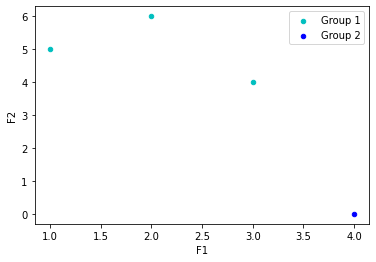

In [58]:
data = {
    'F1': [1, 2, 3, 4], 
    'F2': [5, 6, 4, 0]
}
df = pd.DataFrame(data)

ax = df.loc[df['F1'] < 4].plot.scatter(x='F1', y='F2', c='c', label='Group 1')
df.loc[df['F1'] >= 4].plot.scatter(x='F1', y='F2', c='b', label='Group 2', ax=ax);

In [59]:
input = df[['F1', 'F2']]
input

,F1,F2
0,1,5
1,2,6
2,3,4
3,4,0


In [469]:
class Neuron():

    def __init__(self):
        self.LIMIT_EPOCHS = 10
        # Taxa de aprendizado
        self.LEARNING_RATE = 0.05 
        
        self.errors = []
        self.weights = []
        self.dataset_inputs = []
        self.dataset_outputs = []
    
        
    def train(self):
        len_amostras = len(self.dataset_inputs)
        print('N. AMOSTRAS:  ', len_amostras)

        
        for epoch in range(0, self.LIMIT_EPOCHS):
            
            error = False
            self.synaptic_weights = self.newRandomWeights()
            
            for iteration in range(0, len_amostras):
                
                inputNet = self.dataset_inputs[iteration]
                output = self.think(inputNet)
                error = self.dataset_outputs[iteration] - output
                sum_errors = np.sum(np.array(error))
                
                print('-------- LOW LEVEL -----------')
                print('Epoch: ', epoch)
                print('inputNet: ', inputNet)
                print('output think: ', output)
                print('outputSet: ', self.dataset_outputs)
                print('ERROR: ', error) 
                print('SUM ERROR: ', sum_errors)
                
                self.errors.append([epoch, sum_errors])
                # adjustment = dot(training_set_inputs.T, error * self.__sigmoid_derivative(output))
    
                # updating erros
# 				if y != self.saidas[i]:
# 					# calcula o erro
# 					erro_aux = self.saidas[i] - y
# 					# faz o ajuste dos pesos para cada elemento da amostra
# 					for j in range(self.n_atributos + 1):
# 						self.pesos[j] = self.pesos[j] + self.taxa_aprendizado * erro_aux * self.amostras[i][j]
# 					erro = True # o erro ainda existe
                if sum_errors > 0:
                    self.synaptic_weights = self.recalc_weights(inputNet, output, error)


                print('-------------------')

                # critério de parada
                # if not erro or epoch > self.LIMIT_EPOCHS:
                if sum_errors == 0 or epoch > self.LIMIT_EPOCHS:
                    break
             

        
    def newRandomWeights(self):
        # random.seed(123456789000)
        w = 2 * random.random((3, 1)) - 1
        return w
    
    def recalc_weights(self, inputs, output, error):
        # newWeight = self.synaptic_weights + (self.dataset_inputs.T * error * self.LEARNING_RATE)
        print('>> synaptic_weights: ', self.synaptic_weights)
        print('>> inputs: ', inputs)
        print('>> error: ', error)
        dot_error = dot(inputs, error)
        new_synaptic_weights = self.synaptic_weights + (dot_error * self.LEARNING_RATE)
        print('>> NEW W:', new_synaptic_weights)
        return new_synaptic_weights
        # self.synaptic_weights = dot(self.dataset_inputs.T, (inputs - output) * output * self.LEARNING_RATE)
        # self.synaptic_weights = output - self.LEARNING_RATE
        # self.synaptic_weights += dot(training_set_inputs.T, (training_set_outputs - output) * output * (1 - output))
        # self.synaptic_weights += dot(training_set_inputs, (training_set_outputs - output) * output * (1 - output))
    
    def think(self, input):
        a = [input]
        multiplication = dot(a, self.synaptic_weights)[-1][-1]        
        fn_activation_value = self.__sigmoid(multiplication)
        print('INPUT THINK: ', a)
        print('W. SYNAPT THINK: ', self.synaptic_weights)
        print('Fn. MUL: ', multiplication)
        print('Fn. SIG: ', fn_activation_value)
        
        return fn_activation_value
        
    # The Sigmoid function, which describes an S shaped curve.
    # We pass the weighted sum of the inputs through this function to
    # normalise them between 0 and 1.
    def __sigmoid(self, x):
        return 1 / (1 + exp(-x))

    # The derivative of the Sigmoid function.
    # This is the gradient of the Sigmoid curve.
    # It indicates how confident we are about the existing weight.
    def __sigmoid_derivative(self, x):
        return x * (1 - x)
     
    
    def show_erros(self):
        dfErros = pd.DataFrame(self.errors, columns=('Epoch', 'Erros'))
        print(dfErros)
#         df.columns = ['x', 'y']
#         dfErros.plot.scatter(x=0, y=1, c='c', label='Group 1')
        dfErros.plot()
#         print(self.errors[['b']])
#         print(dfErros)
#         dfErros


In [482]:
neuron = Neuron()
# 1, 2, 3, 4
# 5, 6, 4, 0
input = array([
                [0, 0, 0], 
                [1, 0, 0], 
                [1, 1, 0], 
                [1, 1, 1]
            ])
output = array([0, 0, 0, 1])
input


# dados = pd.DataFrame()
# dados['x'] = np.linspace(-10,10,10)
# dados['y'] = 5 + 3*dados['x'] + np.random.normal(0,3,10)
# dados.plot(x='x', y='y', kind='scatter')

array([[0, 0, 0],
       [1, 0, 0],
       [1, 1, 0],
       [1, 1, 1]])

In [360]:
output

array([0, 1, 1, 0])

In [483]:
neuron.dataset_inputs = input
neuron.dataset_outputs = output.T
neuron.train()

N. AMOSTRAS:   4
INPUT THINK:  [array([0, 0, 0])]
W. SYNAPT THINK:  [[-0.73938828]
 [-0.72845384]
 [ 0.05734474]]
Fn. MUL:  0.0
Fn. SIG:  0.5
-------- LOW LEVEL -----------
Epoch:  0
inputNet:  [0 0 0]
output think:  0.5
outputSet:  [0 0 0 1]
ERROR:  -0.5
SUM ERROR:  -0.5
-------------------
INPUT THINK:  [array([1, 0, 0])]
W. SYNAPT THINK:  [[-0.73938828]
 [-0.72845384]
 [ 0.05734474]]
Fn. MUL:  -0.739388280860616
Fn. SIG:  0.3231379243752102
-------- LOW LEVEL -----------
Epoch:  0
inputNet:  [1 0 0]
output think:  0.3231379243752102
outputSet:  [0 0 0 1]
ERROR:  -0.3231379243752102
SUM ERROR:  -0.3231379243752102
-------------------
INPUT THINK:  [array([1, 1, 0])]
W. SYNAPT THINK:  [[-0.73938828]
 [-0.72845384]
 [ 0.05734474]]
Fn. MUL:  -1.467842118598899
Fn. SIG:  0.18727082290037977
-------- LOW LEVEL -----------
Epoch:  0
inputNet:  [1 1 0]
output think:  0.18727082290037977
outputSet:  [0 0 0 1]
ERROR:  -0.18727082290037977
SUM ERROR:  -0.18727082290037977
-------------------
I

    Epoch     Erros
0       0 -0.500000
1       0 -0.323138
2       0 -0.187271
3       0  0.803844
4       1 -0.500000
5       1 -0.531522
6       1 -0.318090
7       1  0.614328
8       2 -0.500000
9       2 -0.423708
10      2 -0.536995
11      2  0.696393
12      3 -0.500000
13      3 -0.325582
14      3 -0.546682
15      3  0.443411
16      4 -0.500000
17      4 -0.424206
18      4 -0.415403
19      4  0.493595
20      5 -0.500000
21      5 -0.665697
22      5 -0.486888
23      5  0.655271
24      6 -0.500000
25      6 -0.530704
26      6 -0.449392
27      6  0.515078
28      7 -0.500000
29      7 -0.697091
30      7 -0.505284
31      7  0.596200
32      8 -0.500000
33      8 -0.632934
34      8 -0.490243
35      8  0.284591
36      9 -0.500000
37      9 -0.533007
38      9 -0.417388
39      9  0.646632


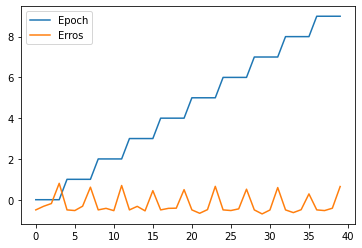

In [484]:
neuron.show_erros()

In [384]:
random.random((4, 1))

for iteration in range(0, 5):
    print(iteration)
    
    
dot(
    [
        [2, 6, 1]
    ], 
    [
        [0.8],
        [0.6],
        [0.0],
    ]
)


# 2 * random.random((3, 1)) - 1



# np.sum(np.array(
#     [
#         [
#             [-0.85981017 , 0.14018983 , 0.14018983 , -0.85981017],
#             [-0.94123366 , 0.05876634 , 0.05876634 , -0.94123366],
#             [-0.93582475 , 0.06417525 , 0.06417525 , -0.93582475],
#             [-0.86801482 , 0.13198518 , 0.13198518 , -0.86801482]
#         ]
#     ]
# ))


[[-1.33492684]][-1][-1]

0
1
2
3
4


-1.33492684